In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv(
    r"/home/ahmed/Ai/Ml-algorithms-from-scratch-and-scikit-learn-in-python-/DataSets/Breast_cancer_data.csv"
)

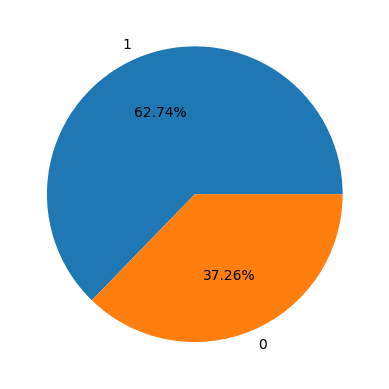

In [17]:
plt.pie(
    df["diagnosis"].value_counts(),
    labels=df["diagnosis"].value_counts().index,
    autopct="%3.2f%%",
)
plt.show()

# Calculate P(Y) for all possible classes


In [39]:
def Prior(df=pd.DataFrame(), Y=""):
    prior, classes = [], sorted(list(df[Y].unique()))
    for i in classes:
        P_i = len(df[df[Y] == i]) / len(df)
        prior.append(P_i)
    return prior

# Calculate P(X|Y) using Gaussian dist.


In [113]:
def Likelihood(df, feature, value, Y, label):
    data = df[df[Y] == label]

    mean, std = data[feature].mean(), data[feature].std()
    P_xi_y = (1 / np.sqrt(2 * np.pi * std**2)) * np.exp(
        -(((value - mean) ** 2) / (2 * std**2))
    )
    return P_xi_y

# Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) \* P(Y=y) for all y and find the maximum


In [114]:
def Gaussian_Naive_Bayes(X_train, X_test, Y):
    features = list(X_train.columns)[:-1]
    y_pred = []

    for x in X_test:

        labels = sorted(list(X_train[Y].unique()))
        likelihood = list([1] * len(labels))

        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= Likelihood(X_train, features[i], x[i], Y, labels[j])

        prior = Prior(X_train, Y)
        proba = [1] * len(labels)

        for P in range(len(prior)):
            proba[P] = likelihood[P] * prior[P]
        y_pred.append(np.argmax(proba))

    return np.array(y_pred)

In [117]:
train, test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
)

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values


Y_pred = Gaussian_Naive_Bayes(train, x_test, "diagnosis")
Y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [118]:
from sklearn.metrics import confusion_matrix, f1_score

print(confusion_matrix(y_test, Y_pred))
print(f1_score(y_test, Y_pred))

[[37  6]
 [ 0 71]]
0.9594594594594594
